In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

The circuit that we are asked to construct in the first part of this problem is equivalent to one that addds one to the target qubits, treated as a binary number mod 4, controlled on the control qubit. That is, we want a controlled version of the circuit

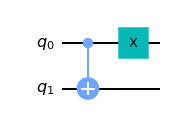

In [6]:
add_mod_4 = QuantumCircuit(2)
add_mod_4.cx(0,1)
add_mod_4.x(0)
add_mod_4.draw()

where `q0` is the least significant bit and `q1` is the most significant bit. The controlled CNOT becomes a Toffoli gate, which we decomposed in the previous exercise. The controlled circuit then becomes

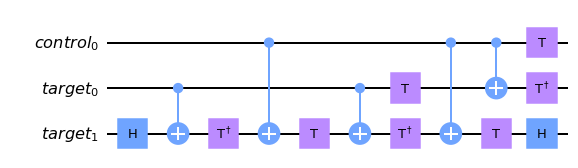

In [4]:
from qiskit import QuantumRegister
from math import pi

c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c, t, name="Controlled 13^x mod 35")

cu.h(t[1])
cu.cx(t[0],t[1])
cu.tdg(t[1])
cu.cx(c[0],t[1])
cu.t(t[1])
cu.cx(t[0],t[1])
cu.tdg(t[1])
cu.cx(c[0],t[1])
cu.t(t[0])
cu.t(t[1])
cu.h(t[1])
cu.cx(c[0],t[0])
cu.t(c[0])
cu.tdg(t[0])

cu.draw()

In [5]:
from qc_grader import grade_ex2a
grade_ex2a(cu)

Grading your answer for ex2/part1. Please wait...

Congratulations 🎉! Your answer is correct.


For the next part, we want to construct a circuit that adds 2 mod 4. This is the same as flipping the `q1` bit. That is, we want a controlled version of

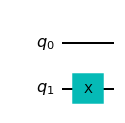

In [7]:
add_2_mod_4 = QuantumCircuit(2)
add_2_mod_4.x(1)
add_2_mod_4.draw()

In [8]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)

cu2.cx(c[0],t[1])

from qc_grader import grade_ex2b
grade_ex2b(cu2)

Grading your answer for ex2/part2. Please wait...

Congratulations 🎉! Your answer is correct.


Finally, we want a circuit that adds 4 mod 4, which is the same as adding 0 mod 4. This is just the identity operator.

In [9]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)
from qc_grader import grade_ex2c
grade_ex2c(cu4)

Grading your answer for ex2/part3. Please wait...

Congratulations 🎉! Your answer is correct.


Finally, we put them all together.

In [12]:
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr, tqr)
solutions = [cu, cu2, cu4]
for i in range(3):
    cux = cux.compose(solutions[i], [cqr[i], tqr[0], tqr[1]])
    
from qc_grader import grade_ex2_final
from qiskit import transpile
cux = transpile(cux, basis_gates=['cx','u'])
grade_ex2_final(cux)

Grading your answer for ex2/part4. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 6.
Feel free to submit your answer.



In [13]:
from qc_grader import submit_ex2_final
submit_ex2_final(cux)

Submitting your answer for ex2/part4. Please wait...
Success 🎉! Your answer has been submitted.
